# Sparse Hebbian Learning : reproducing SparseNet

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
from copy import deepcopy

In [2]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'Olshausen'
homeo_params = dict(eta_homeo=0.05, alpha_homeo=0.02)

opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method=tag, homeo_params=homeo_params, verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')
list_figures = ['show_dico', 'time_plot_error', 'time_plot_qerror']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
#list_figures = []

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 256) - done in 0.45s.


## Homeostasis à-la-SparseNet

loading the dico called : /tmp/data_cache/Olshausen - eta_homeo=0.005000000000000001_dico.pkl


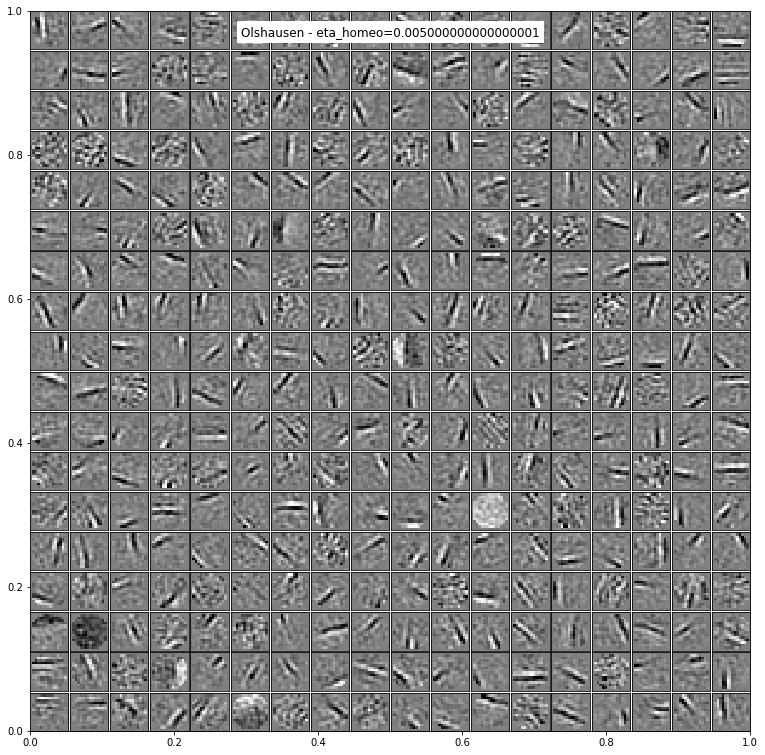

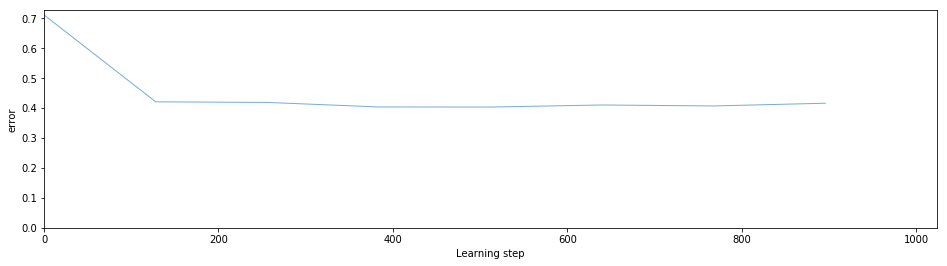

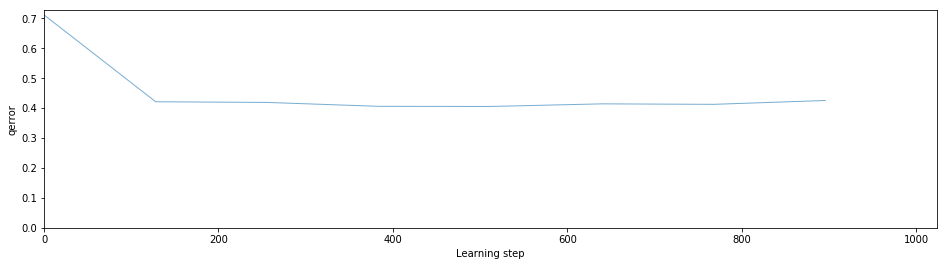

loading the dico called : /tmp/data_cache/Olshausen - eta_homeo=0.010772173450159418_dico.pkl


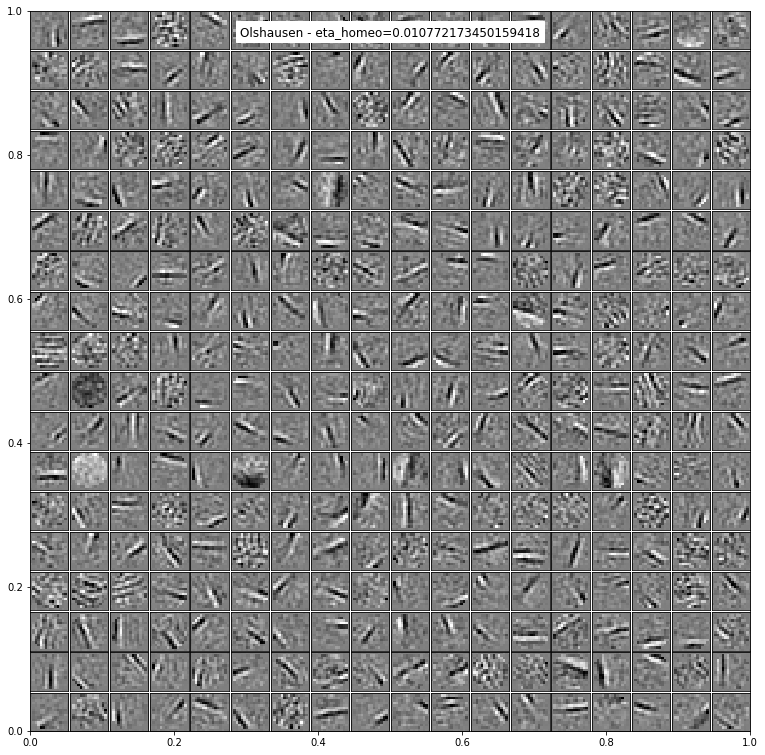

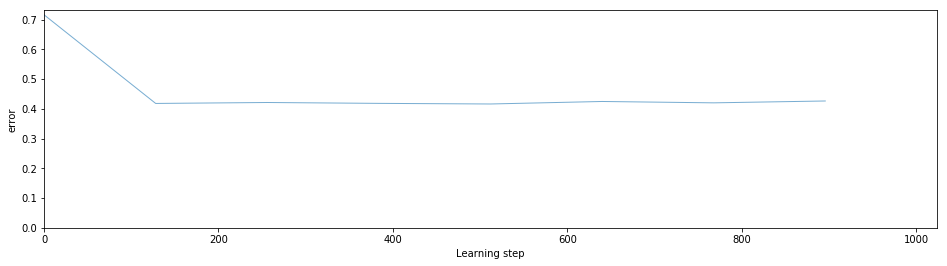

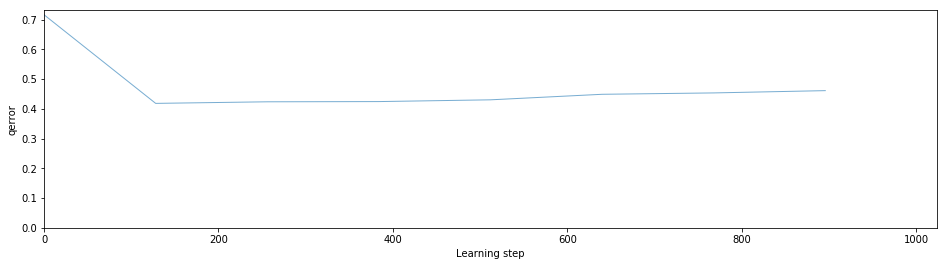

loading the dico called : /tmp/data_cache/Olshausen - eta_homeo=0.023207944168063894_dico.pkl


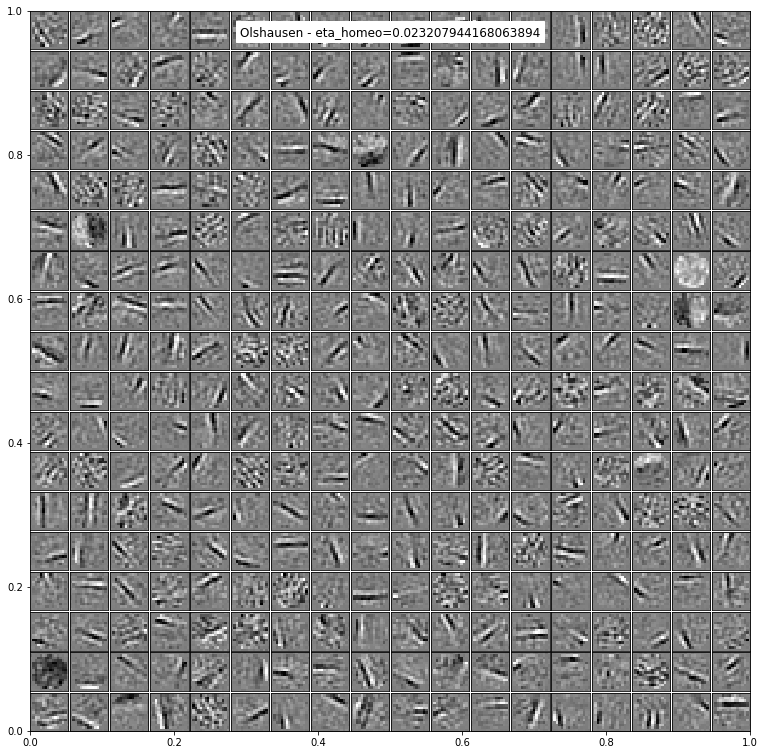

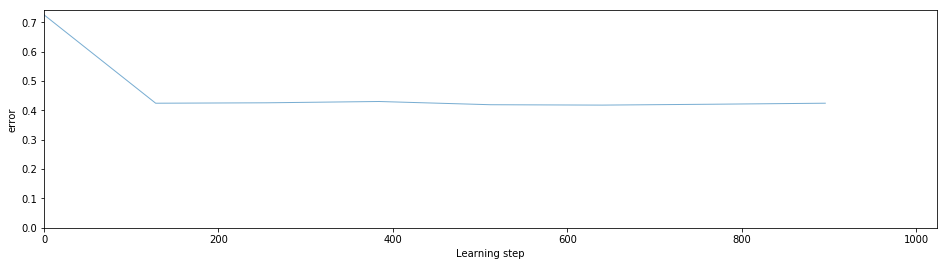

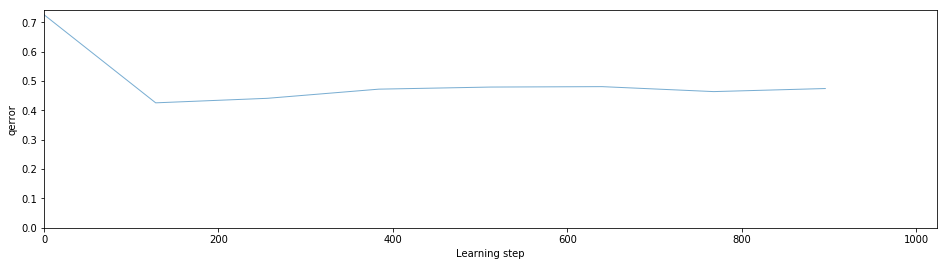

loading the dico called : /tmp/data_cache/Olshausen - eta_homeo=0.05_dico.pkl


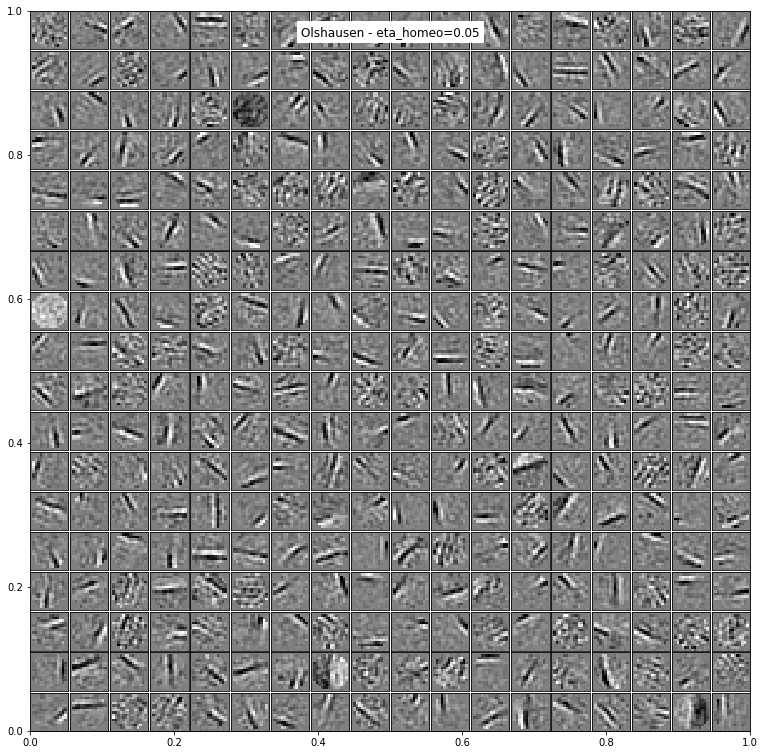

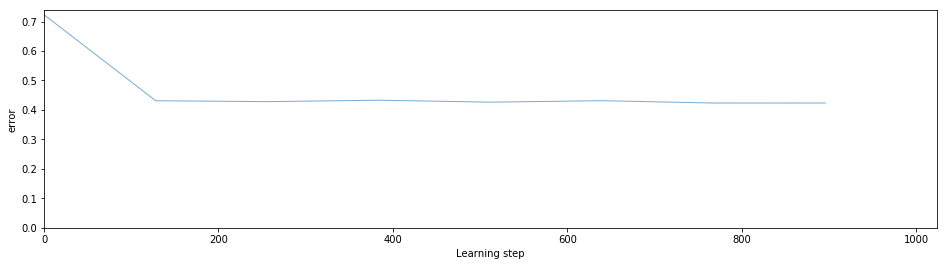

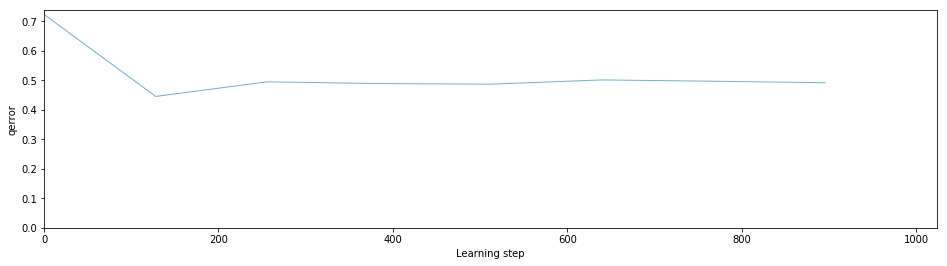

loading the dico called : /tmp/data_cache/Olshausen - eta_homeo=0.10772173450159417_dico.pkl


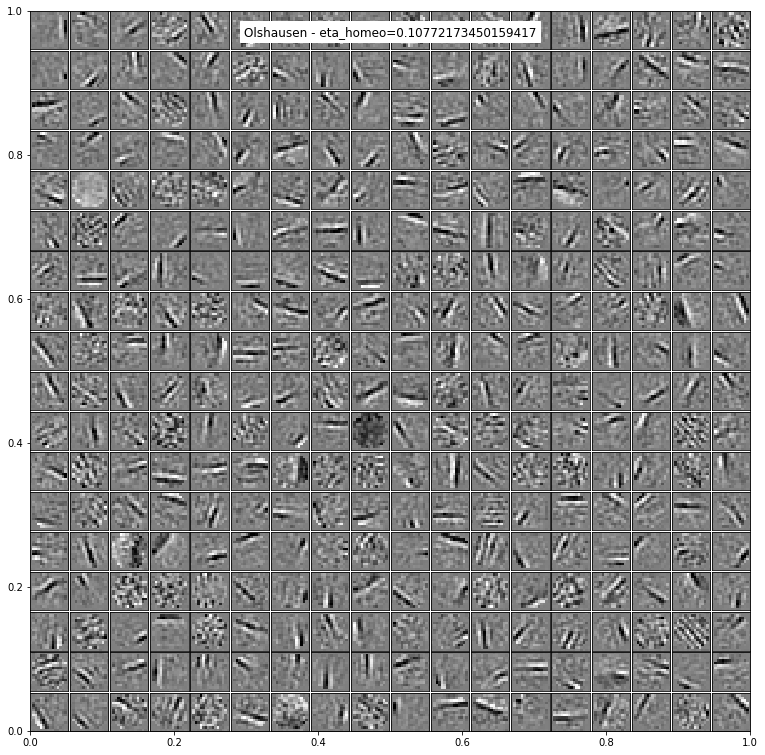

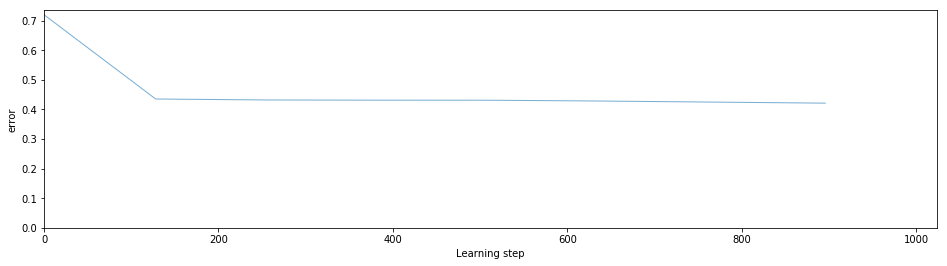

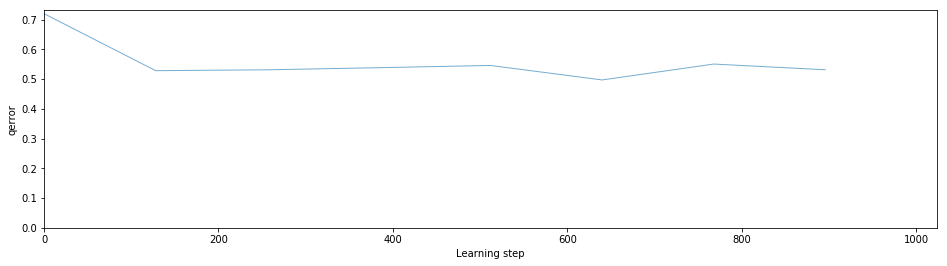

loading the dico called : /tmp/data_cache/Olshausen - eta_homeo=0.23207944168063888_dico.pkl


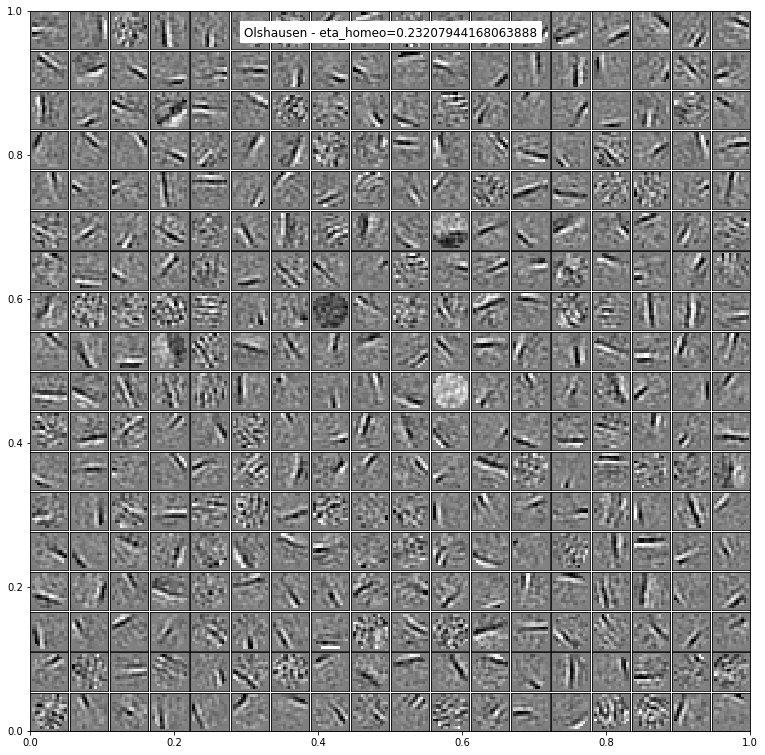

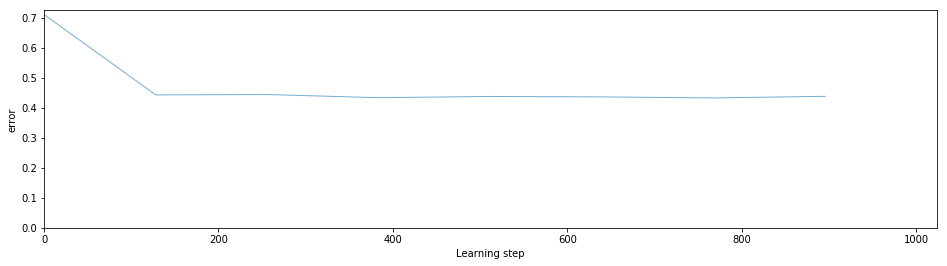

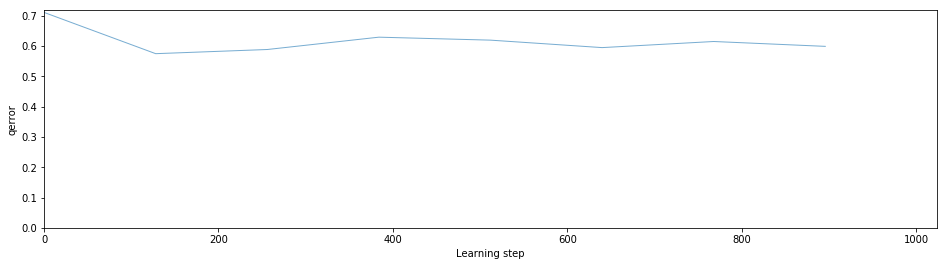

loading the dico called : /tmp/data_cache/Olshausen - eta_homeo=0.5_dico.pkl


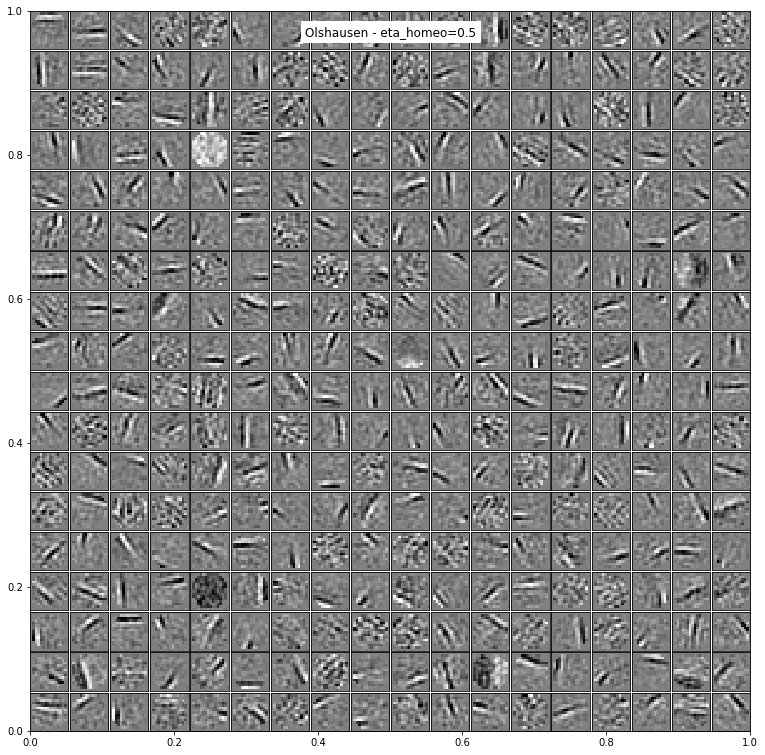

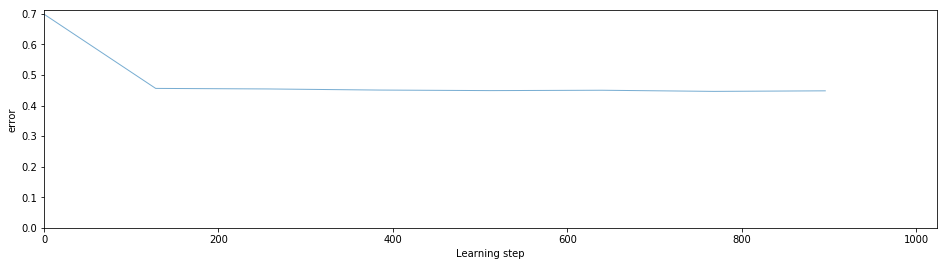

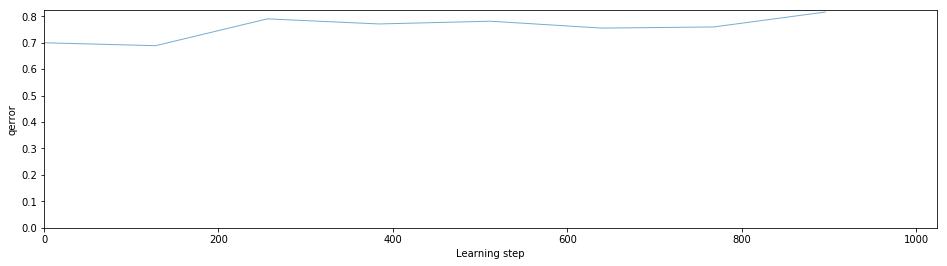

In [3]:
for eta_homeo in np.logspace(-1, 1, N_scan, base=10)*SHL(**opts).homeo_params['eta_homeo']:
    shl = SHL(**deepcopy(opts))    
    matname = tag + ' - eta_homeo={}'.format(eta_homeo)
    shl.homeo_params.update(eta_homeo=eta_homeo)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    
    plt.show()    

loading the dico called : /tmp/data_cache/Olshausen - alpha_homeo=0.002_dico.pkl


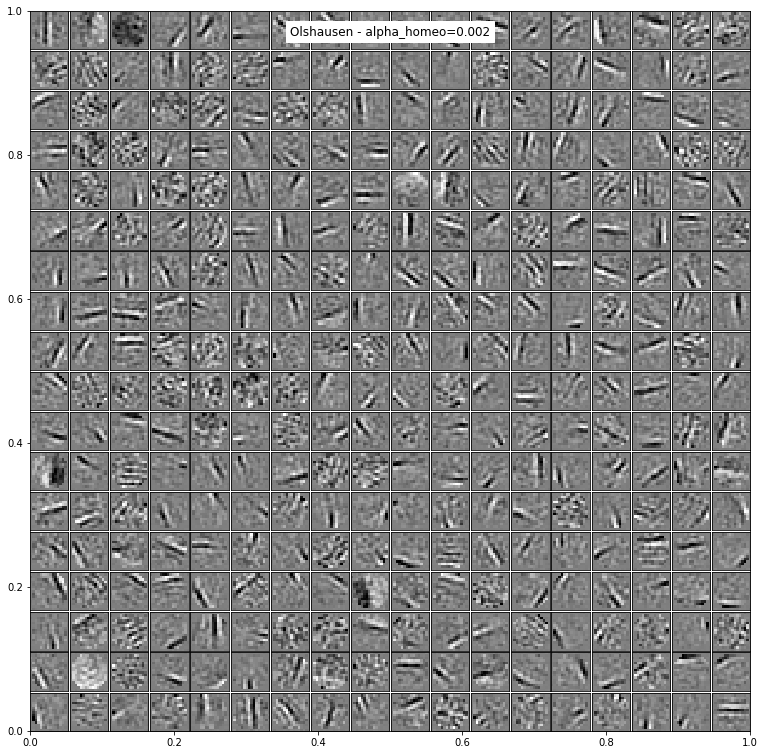

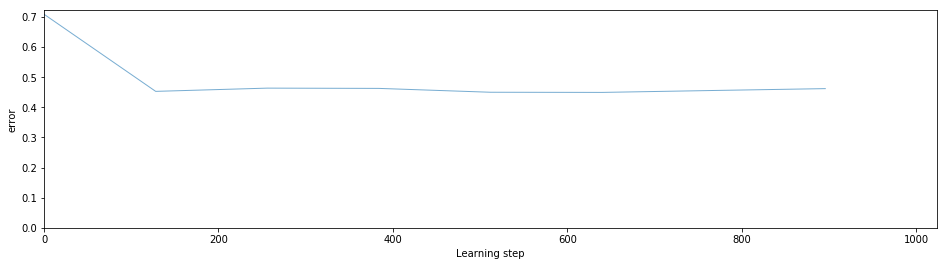

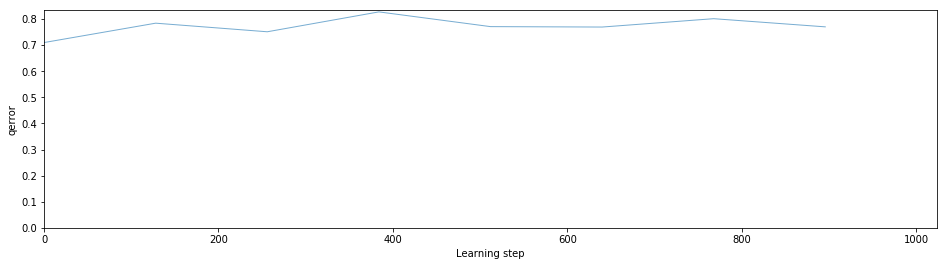

loading the dico called : /tmp/data_cache/Olshausen - alpha_homeo=0.0034226566083235613_dico.pkl


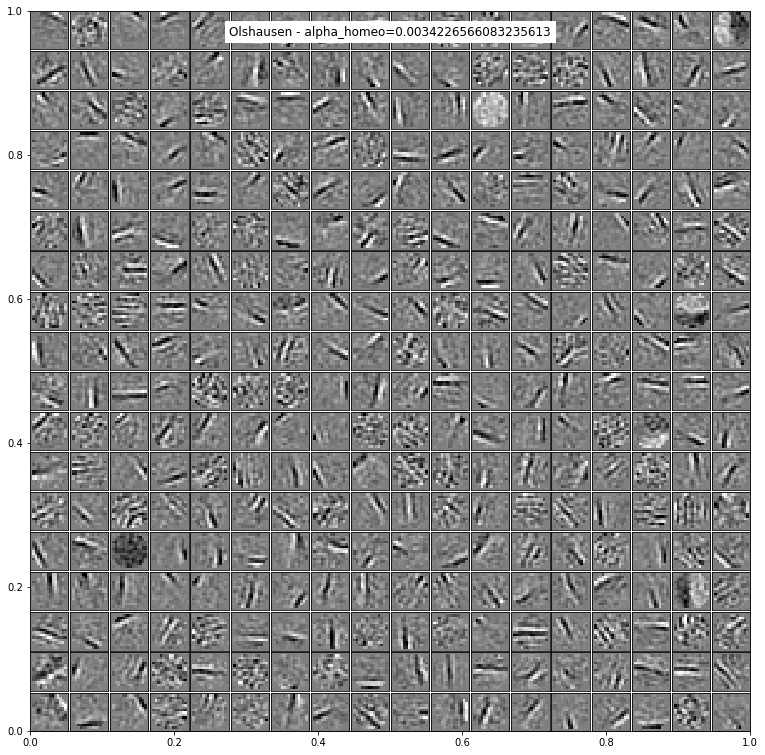

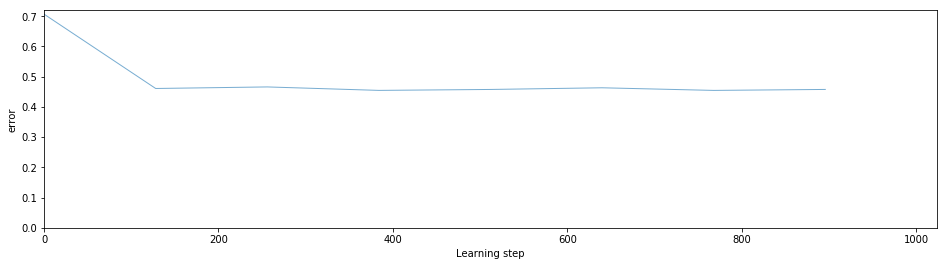

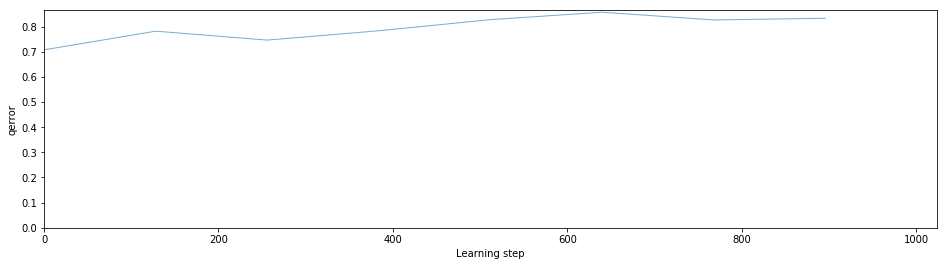

loading the dico called : /tmp/data_cache/Olshausen - alpha_homeo=0.005857289129250471_dico.pkl


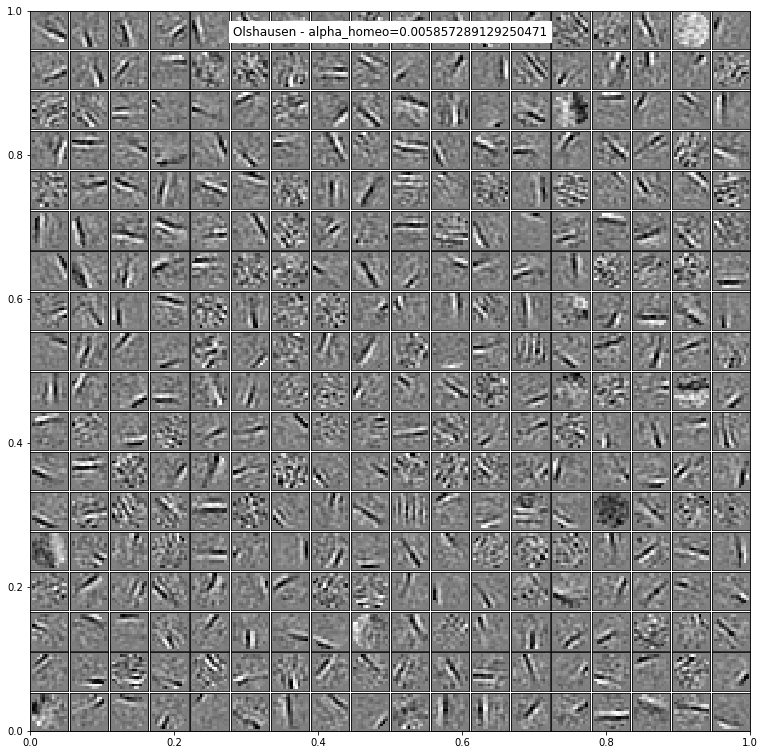

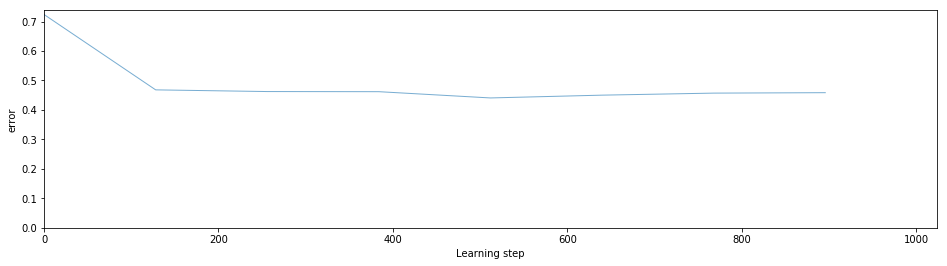

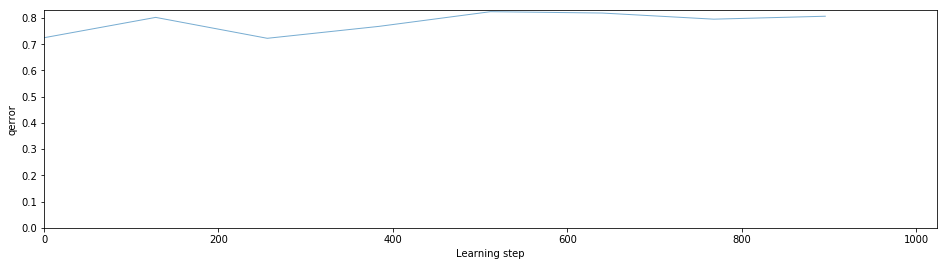

loading the dico called : /tmp/data_cache/Olshausen - alpha_homeo=0.010023744672545446_dico.pkl


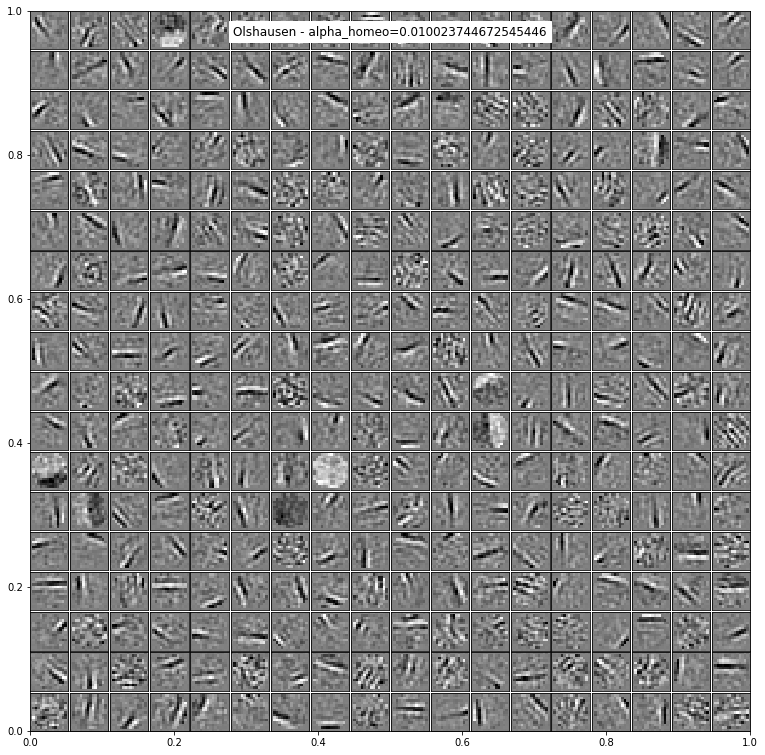

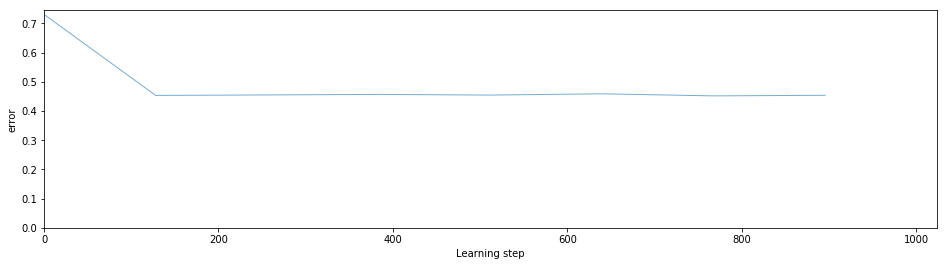

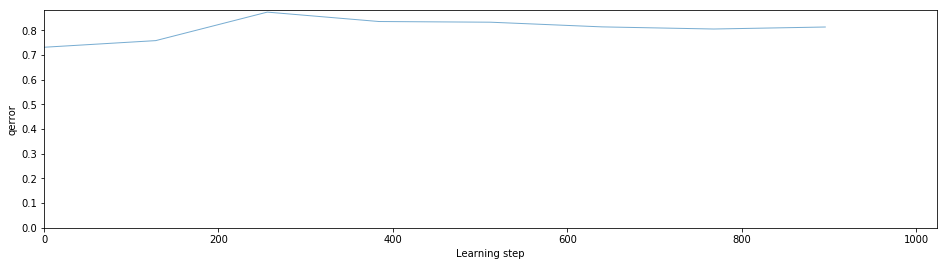

loading the dico called : /tmp/data_cache/Olshausen - alpha_homeo=0.017153917971817877_dico.pkl


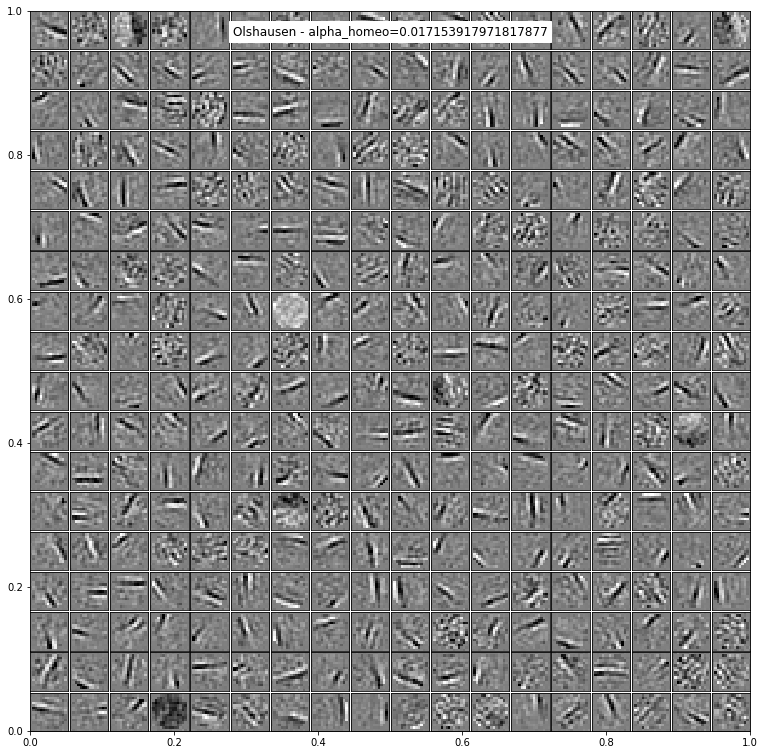

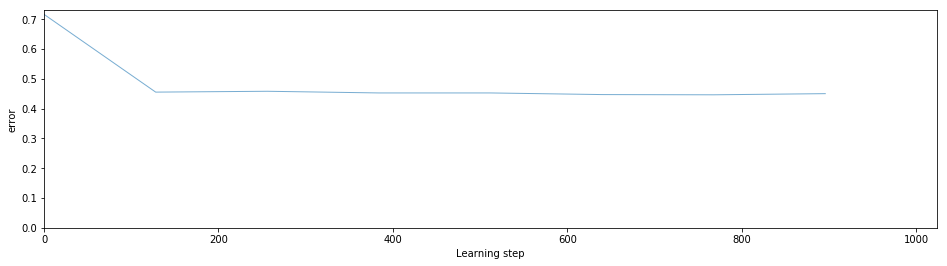

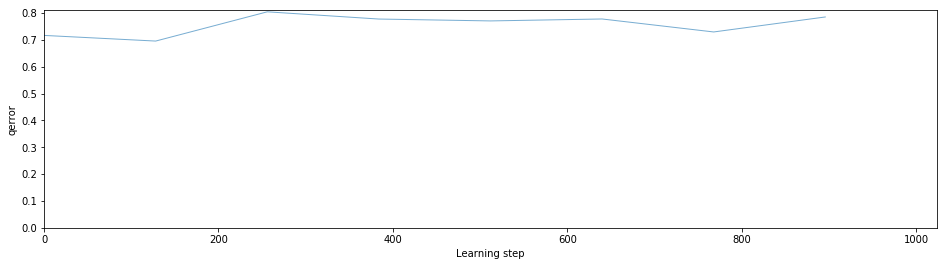

loading the dico called : /tmp/data_cache/Olshausen - alpha_homeo=0.029355985352441383_dico.pkl


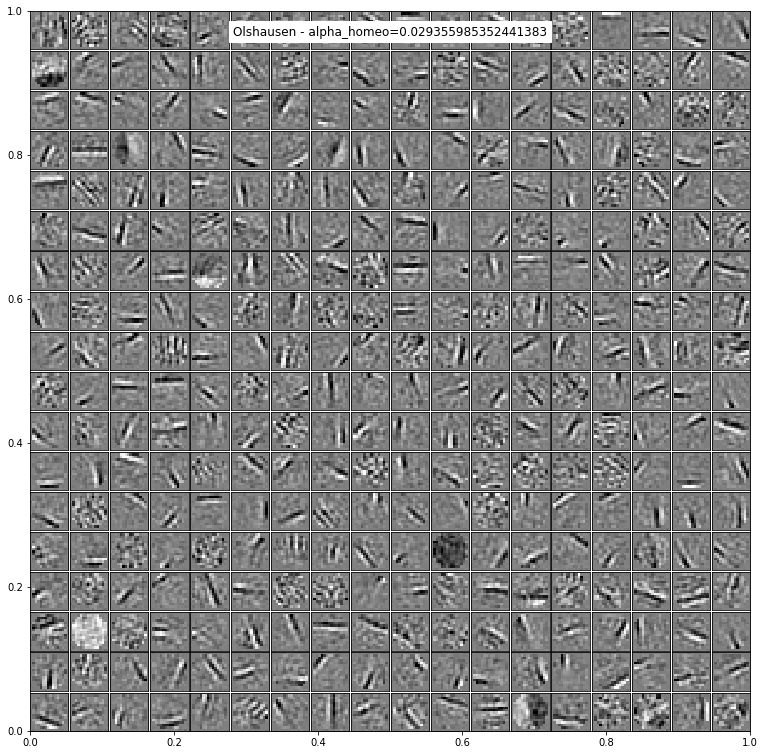

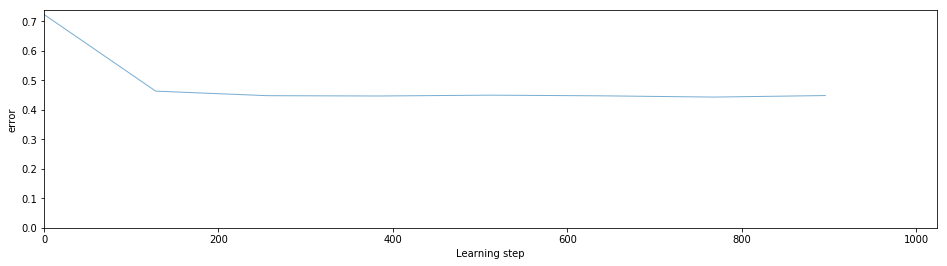

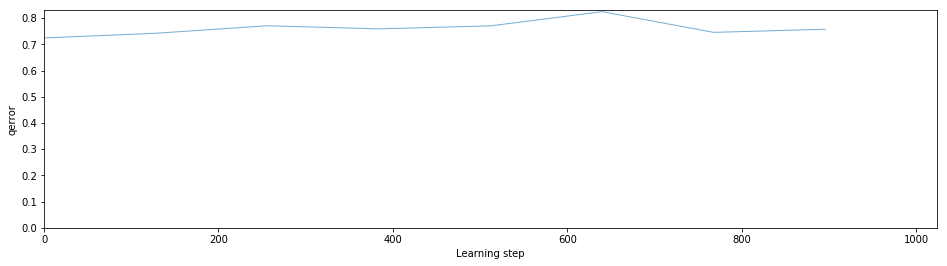

loading the dico called : /tmp/data_cache/Olshausen - alpha_homeo=0.0502377286301916_dico.pkl


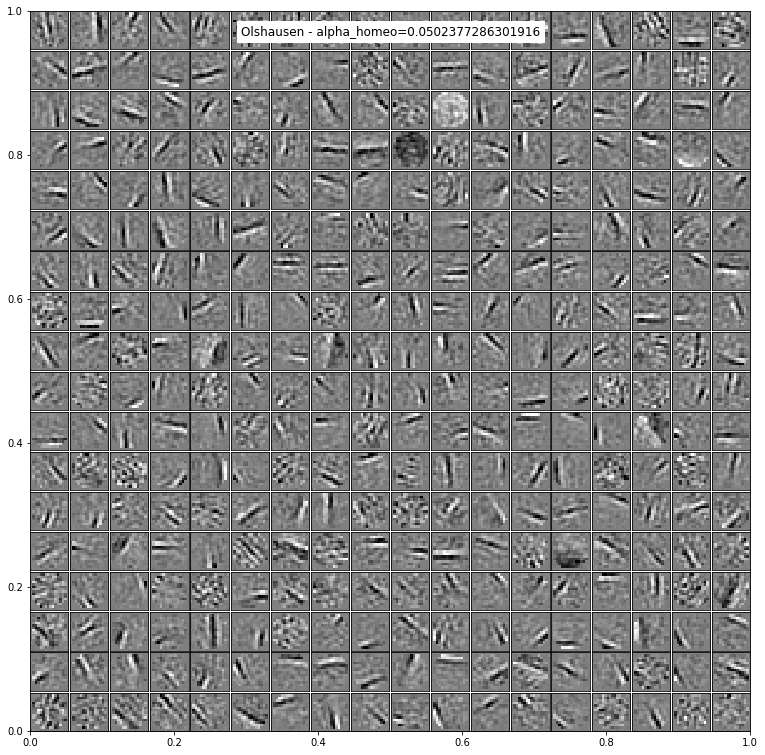

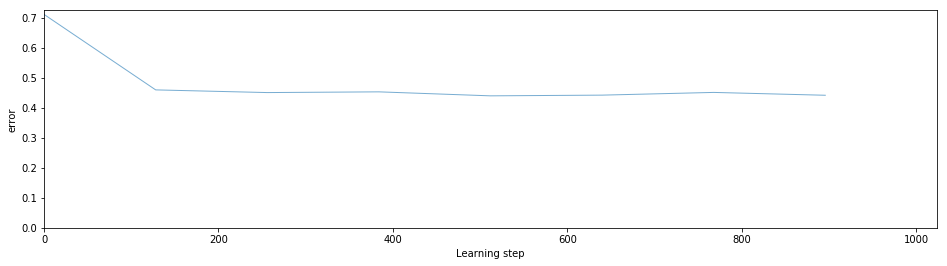

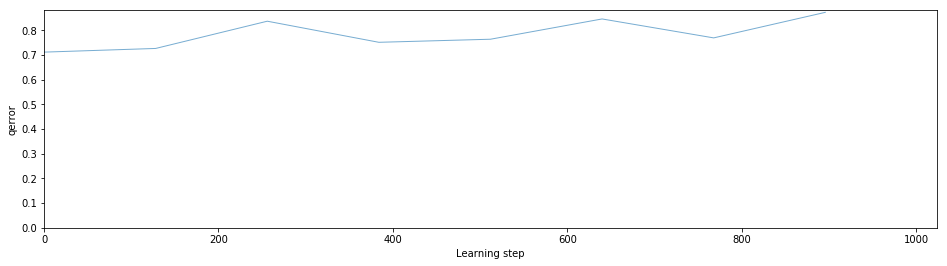

In [4]:
for alpha_homeo in np.logspace(-1, 0.4, N_scan, base=10)*SHL(**opts).homeo_params['alpha_homeo']:
    shl = SHL(**deepcopy(opts))    
    matname = tag + ' - alpha_homeo={}'.format(alpha_homeo)
    shl.homeo_params.update(alpha_homeo=alpha_homeo)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    plt.show()    

loading the dico called : /tmp/data_cache/Olshausen - eta=0.0002_dico.pkl


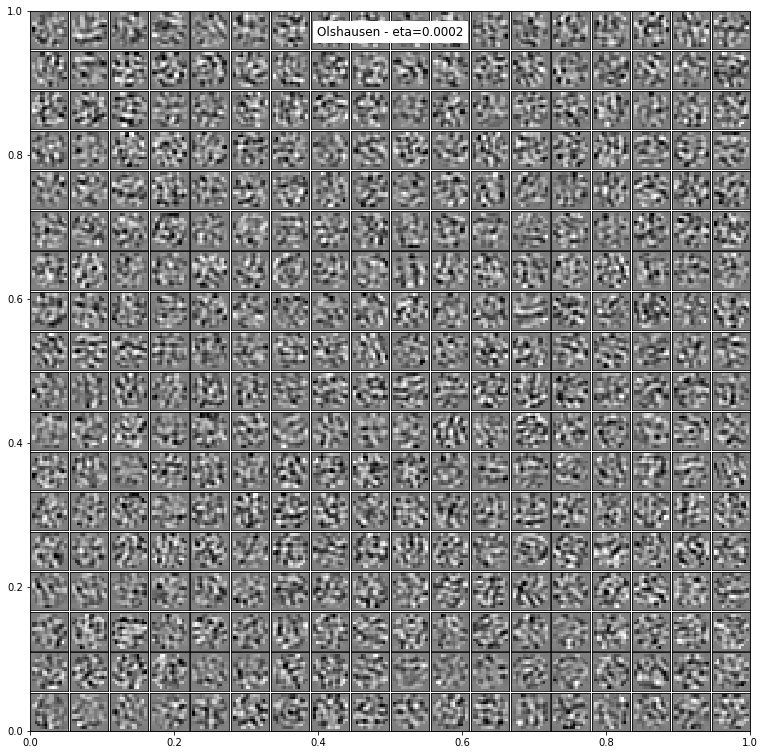

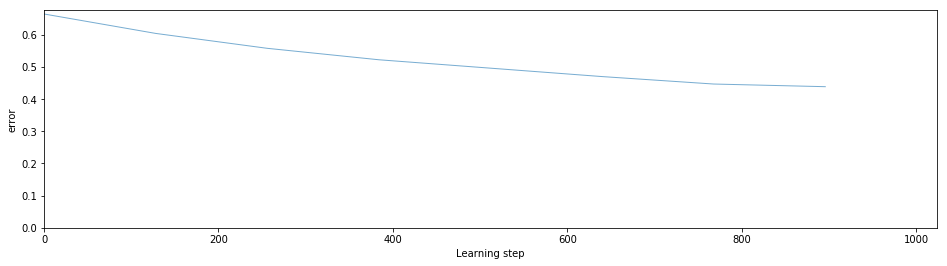

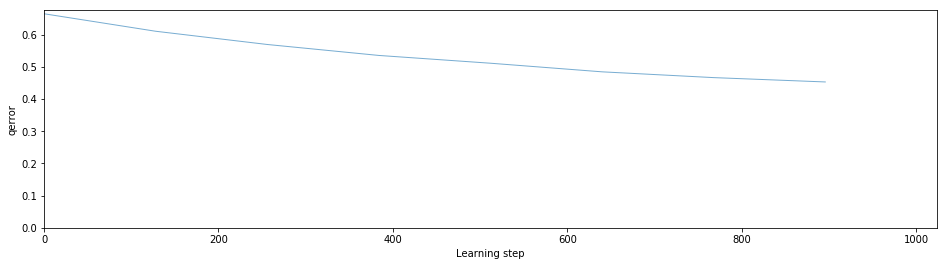

loading the dico called : /tmp/data_cache/Olshausen - eta=0.0004308869380063767_dico.pkl


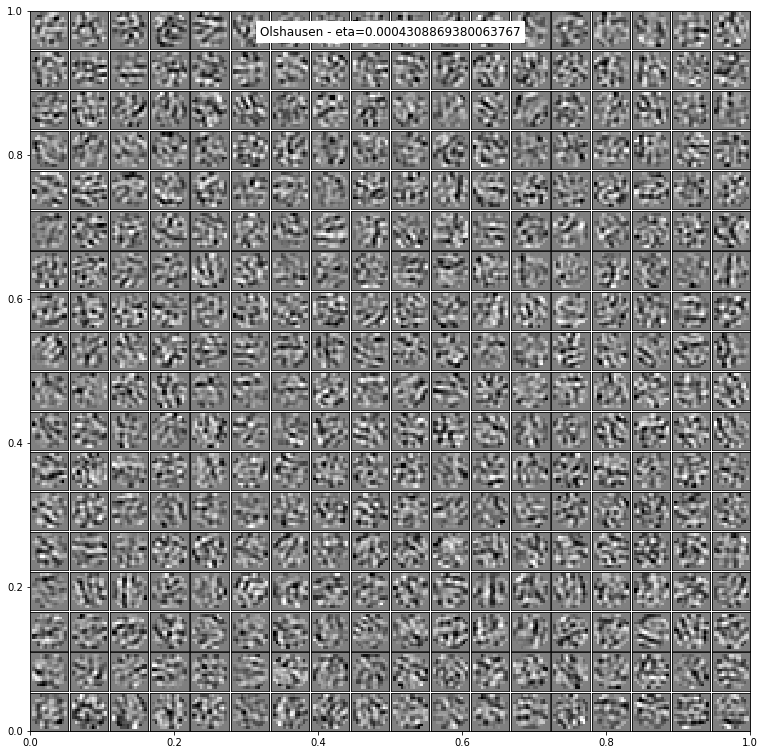

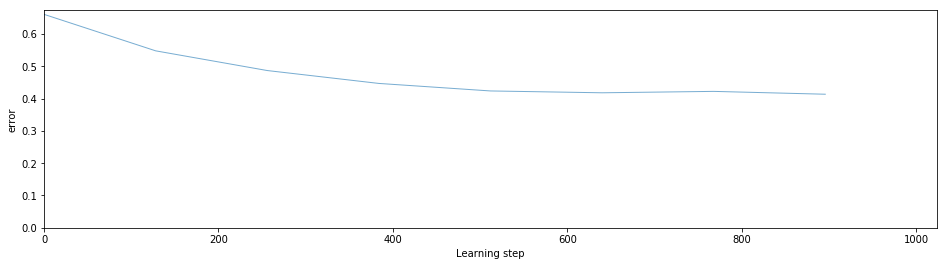

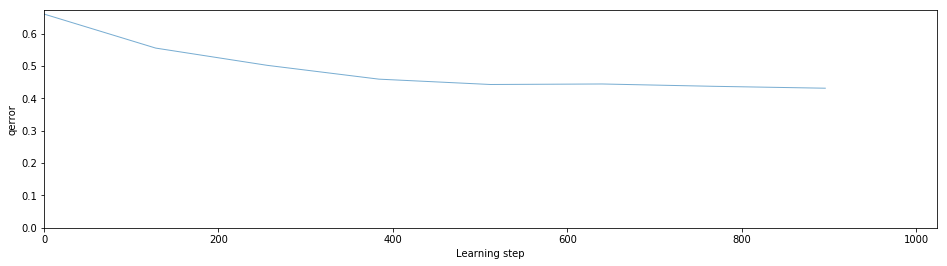

loading the dico called : /tmp/data_cache/Olshausen - eta=0.0009283177667225558_dico.pkl


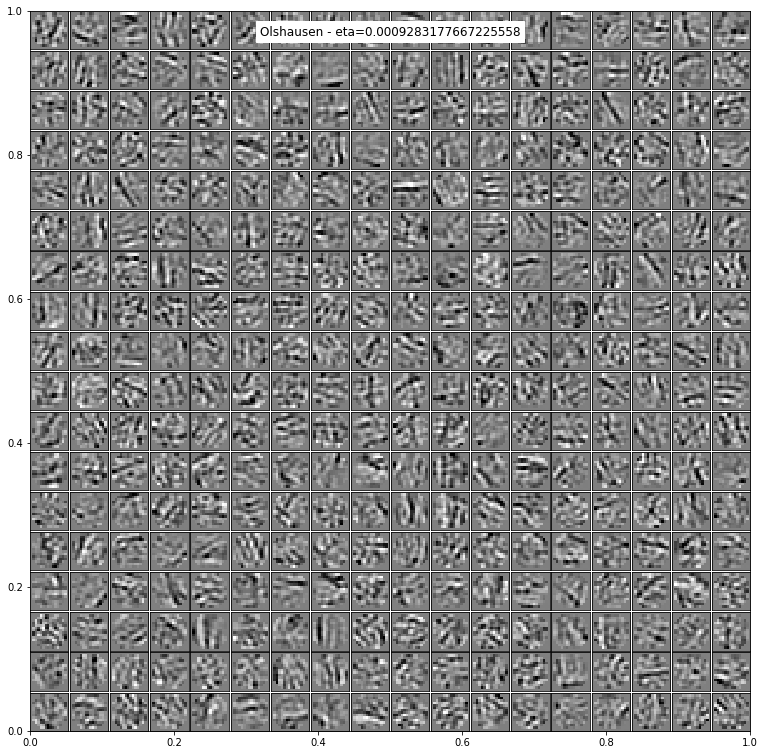

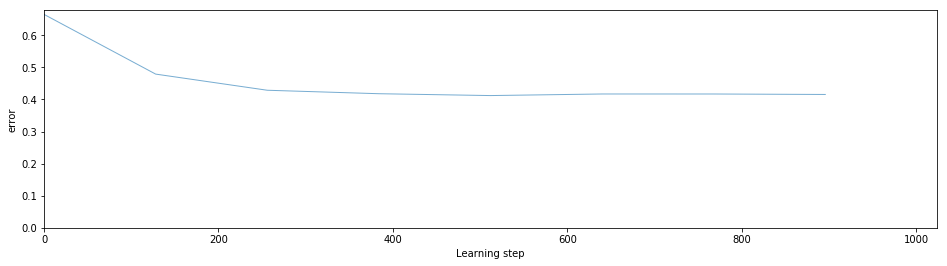

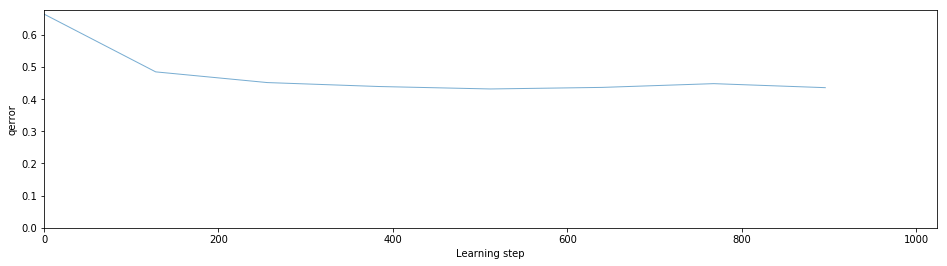

loading the dico called : /tmp/data_cache/Olshausen - eta=0.002_dico.pkl


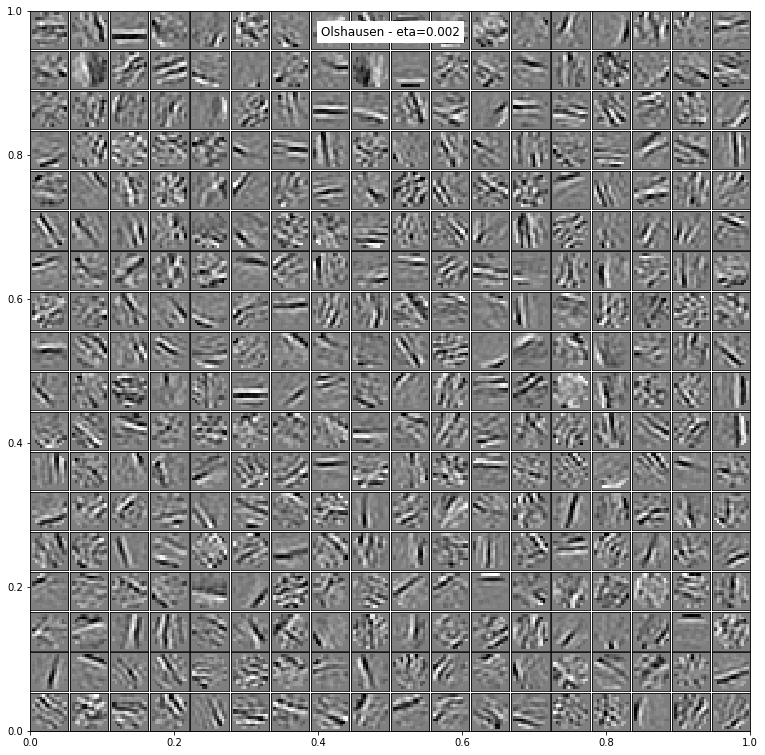

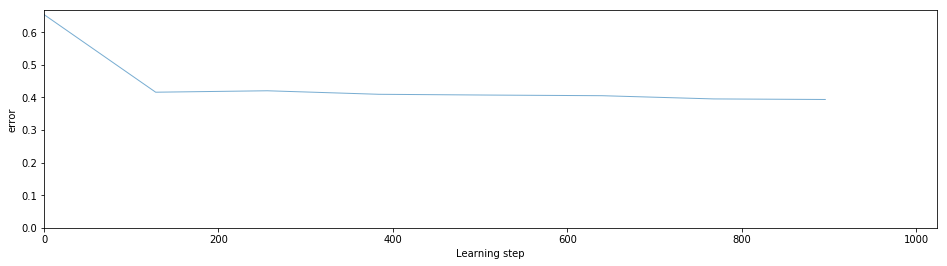

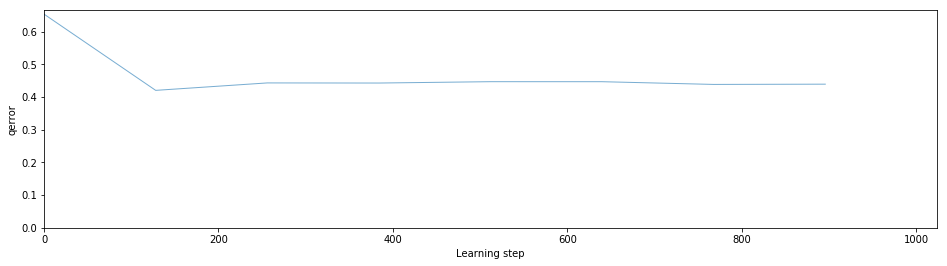

loading the dico called : /tmp/data_cache/Olshausen - eta=0.004308869380063767_dico.pkl


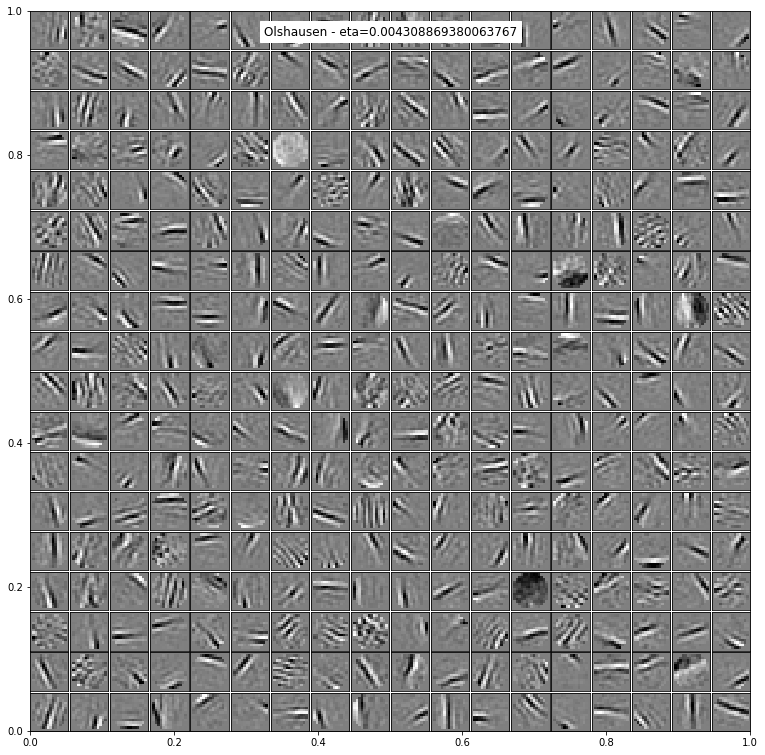

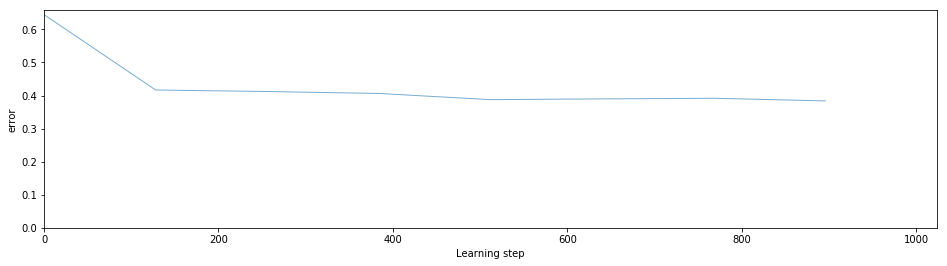

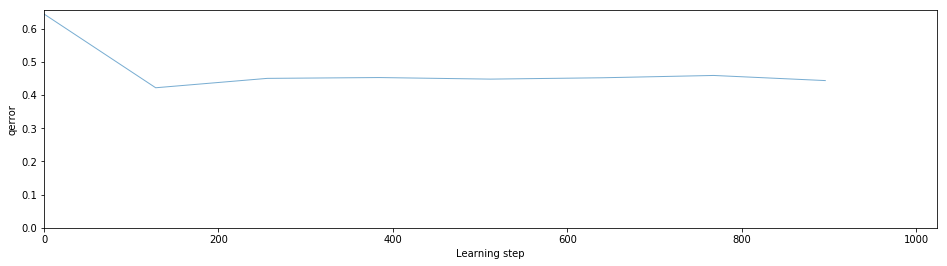

loading the dico called : /tmp/data_cache/Olshausen - eta=0.009283177667225554_dico.pkl


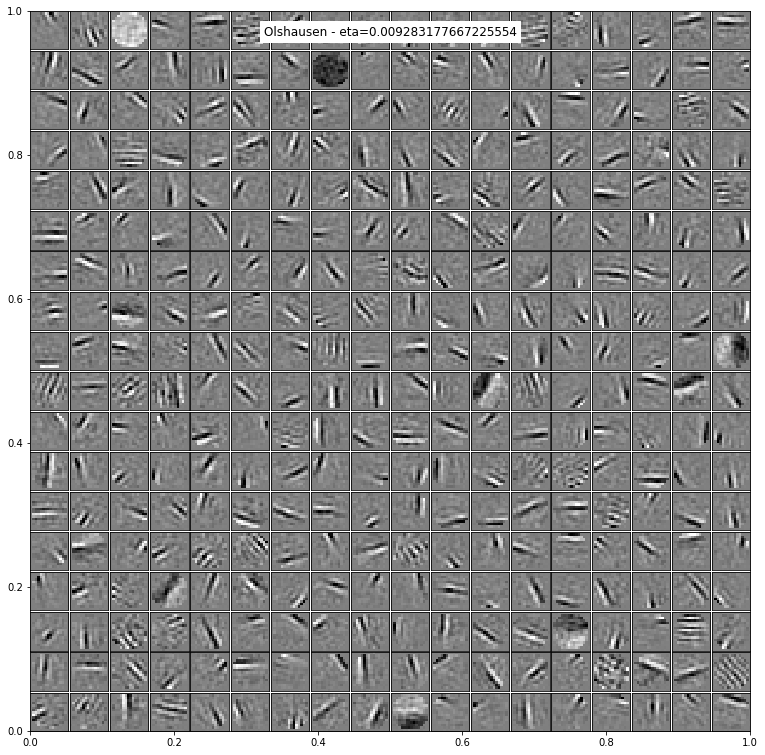

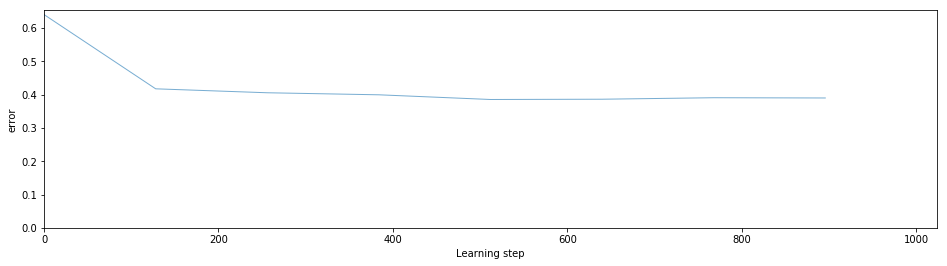

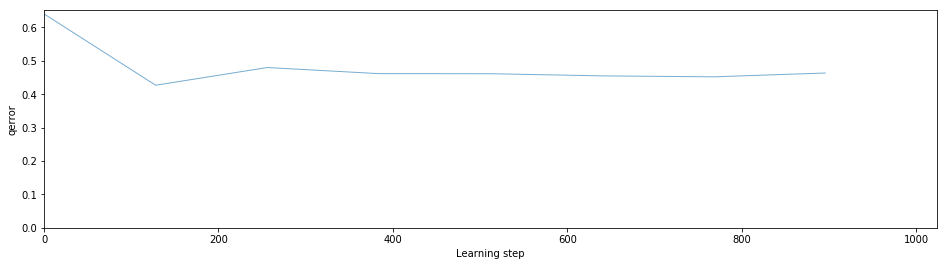

loading the dico called : /tmp/data_cache/Olshausen - eta=0.02_dico.pkl


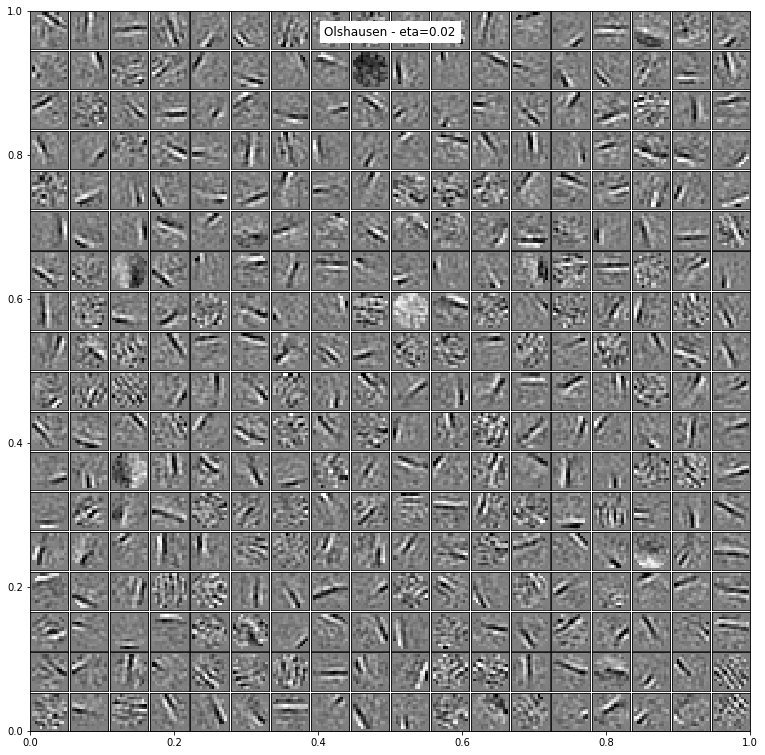

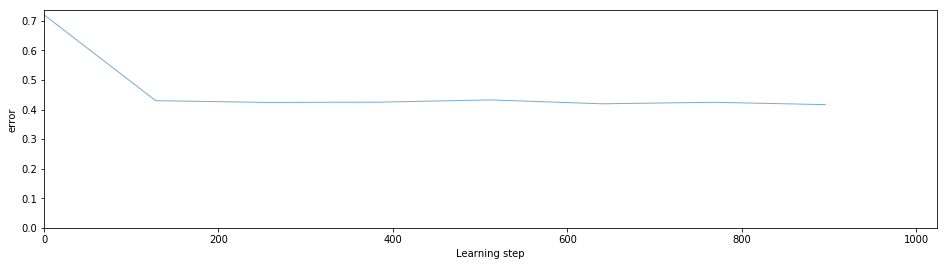

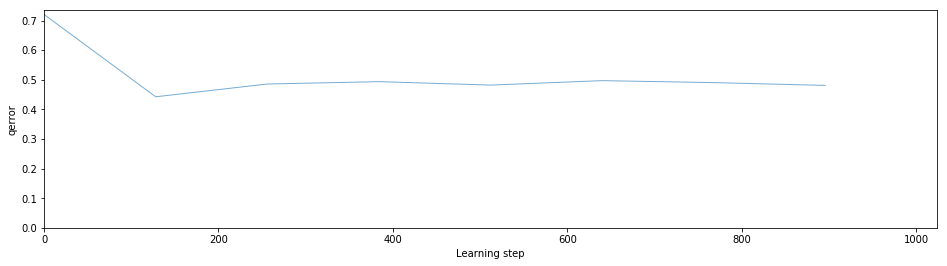

In [5]:
for eta in np.logspace(-1, 1, N_scan, base=10)*SHL(**opts).eta['eta']:
    shl = SHL(**deepcopy(opts))
    matname = tag + ' - eta={}'.format(eta)
    shl.eta.update(eta=eta)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    
    plt.show()    

## comparing the result of learning with different sparse algorithms

loading the dico called : /tmp/data_cache/Olshausen - algorithm=lasso_lars_dico.pkl


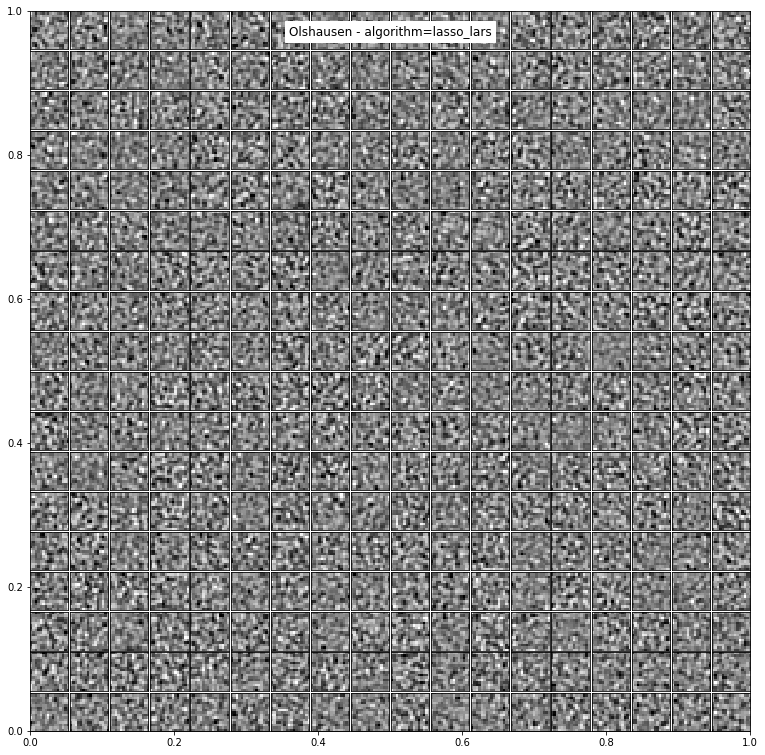

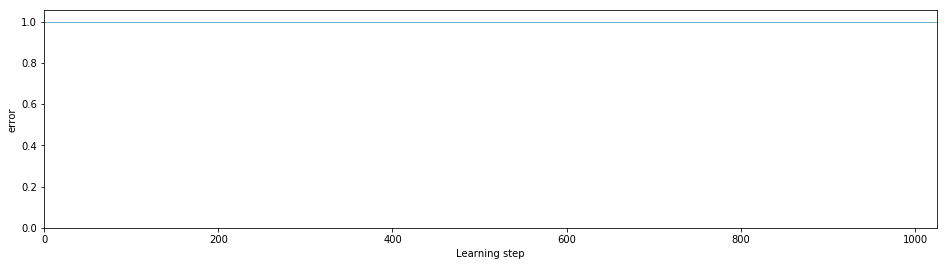

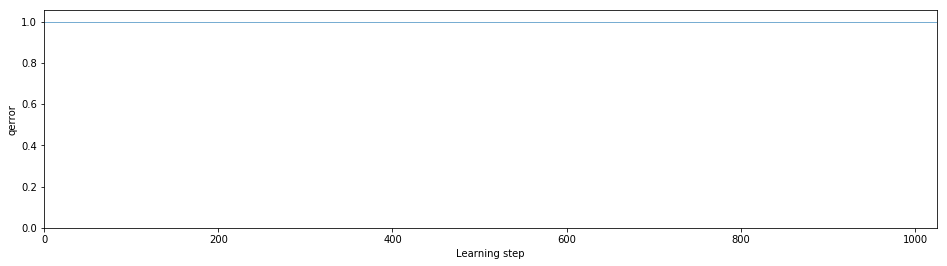

loading the dico called : /tmp/data_cache/Olshausen - algorithm=lasso_cd_dico.pkl


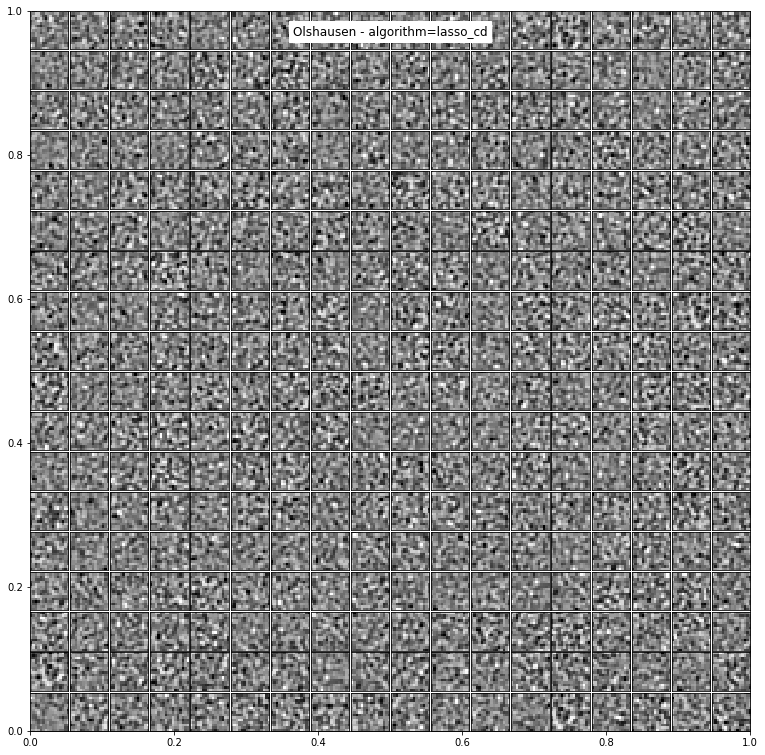

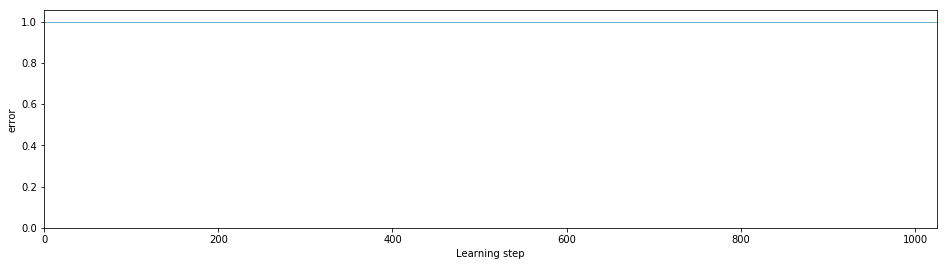

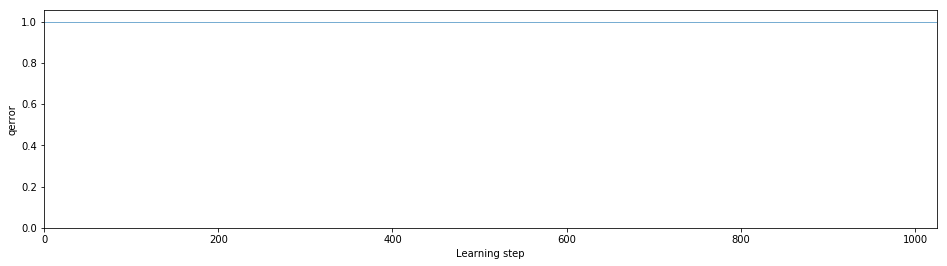

loading the dico called : /tmp/data_cache/Olshausen - algorithm=lars_dico.pkl


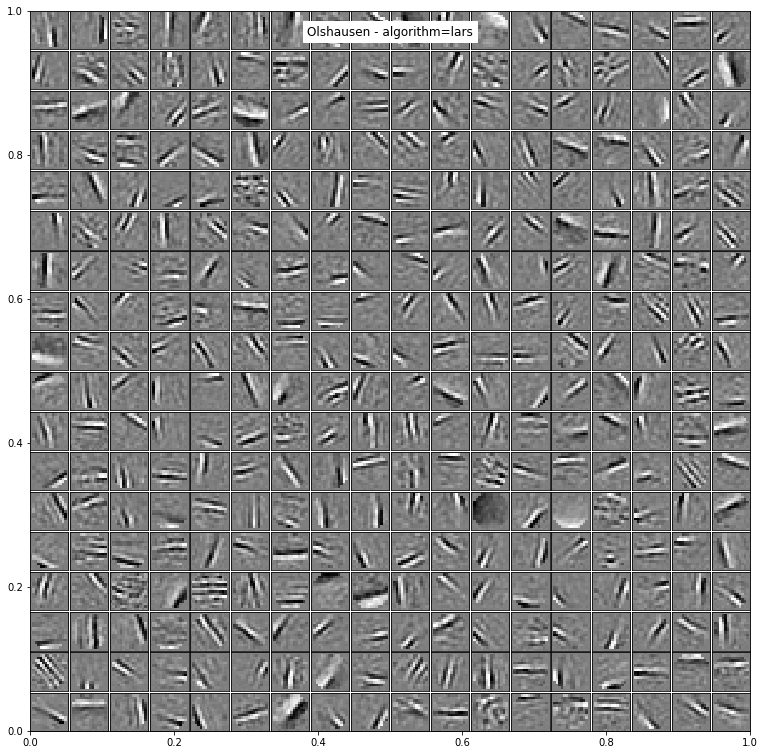

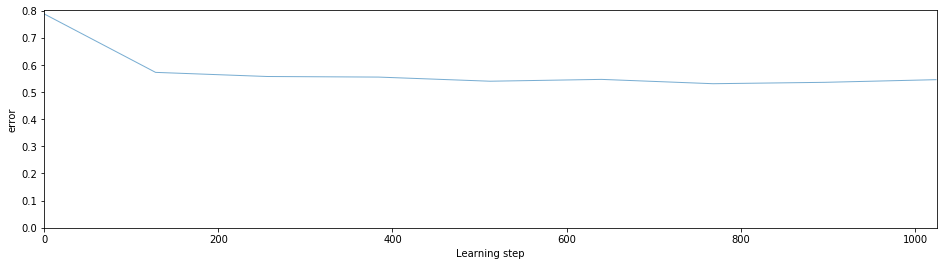

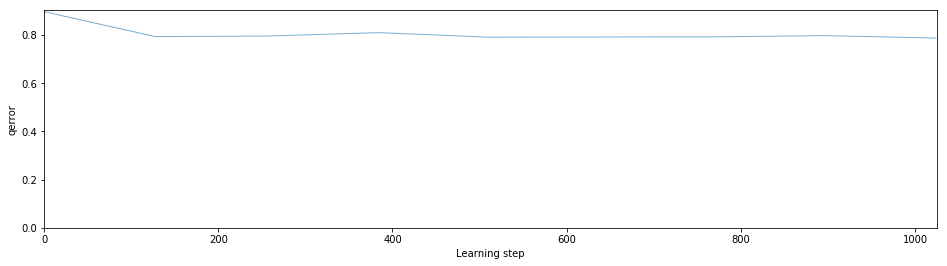

loading the dico called : /tmp/data_cache/Olshausen - algorithm=threshold_dico.pkl


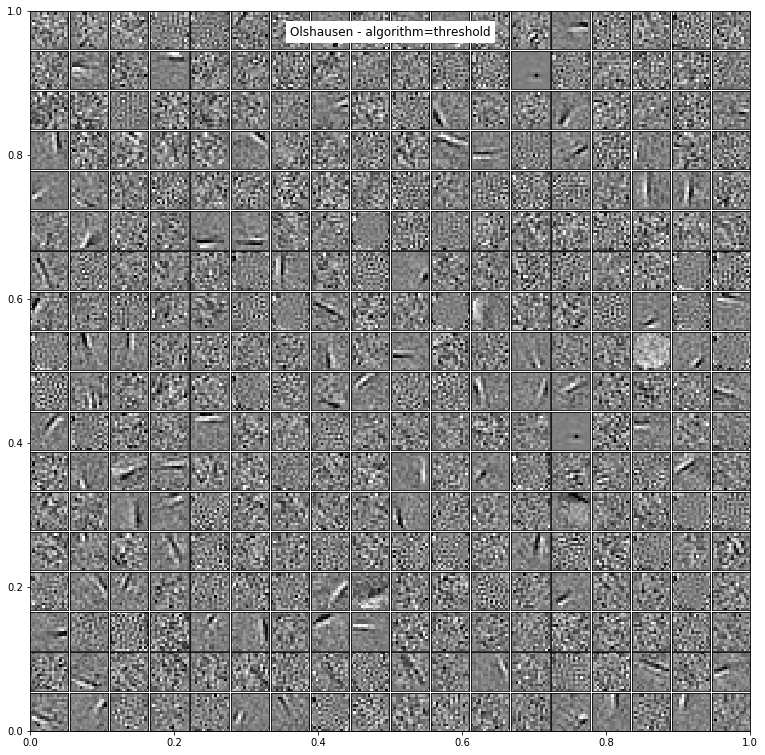

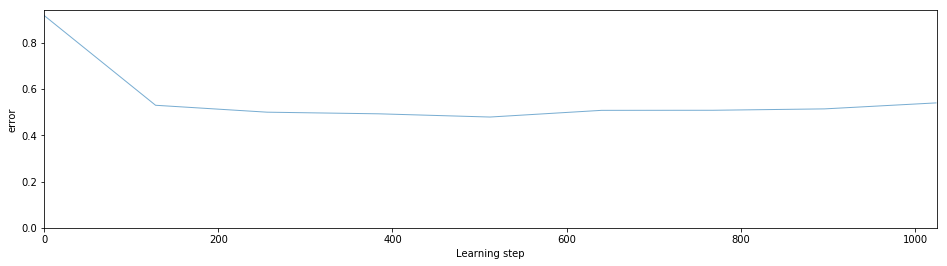

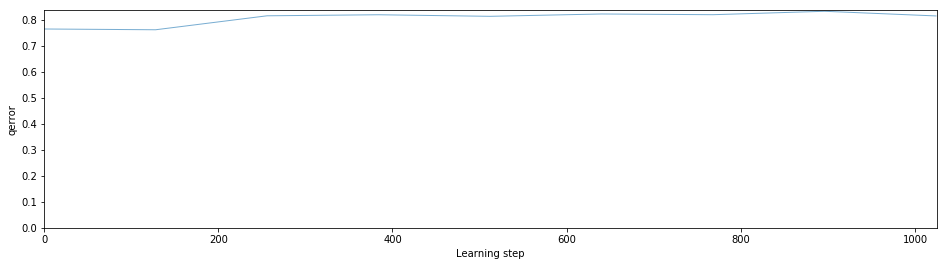

No cache found /tmp/data_cache/Olshausen - algorithm=omp_dico.pkl: Learning the dictionary with algo = omp 
 Training on 81920 patches... Learning code... Iteration   0 /   1025 (elapsed time:   4s,  0.0mn)
Iteration  128 /   1025 (elapsed time:  318s,  5.0mn)
Iteration  256 /   1025 (elapsed time:  667s,  11.0mn)
Iteration  384 /   1025 (elapsed time:  1055s,  17.0mn)
Iteration  512 /   1025 (elapsed time:  1371s,  22.0mn)
Iteration  640 /   1025 (elapsed time:  1646s,  27.0mn)
Iteration  768 /   1025 (elapsed time:  2009s,  33.0mn)
Iteration  896 /   1025 (elapsed time:  2292s,  38.0mn)
Iteration  1024 /   1025 (elapsed time:  2590s,  43.0mn)
done (total time:  2594s,  43.2mn)
done in 2594.82s.


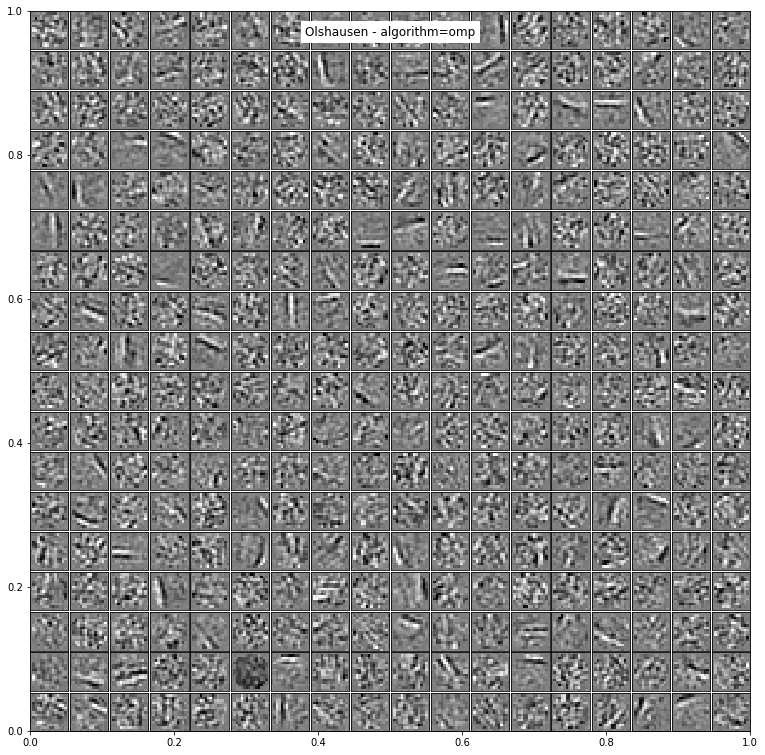

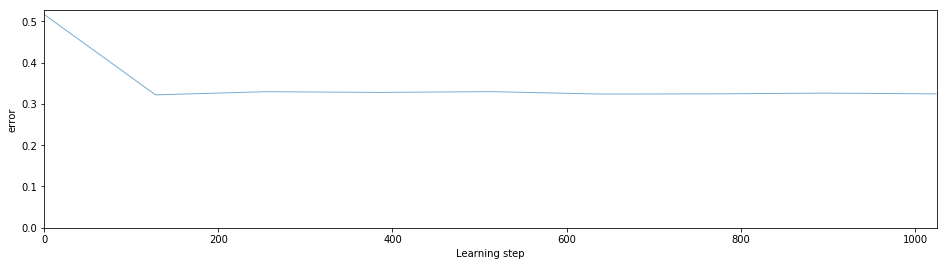

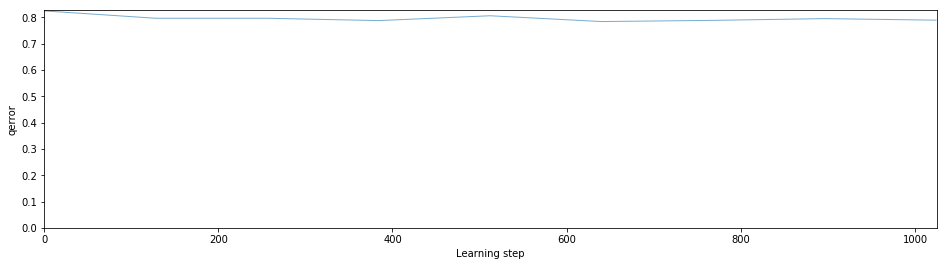

No cache found /tmp/data_cache/Olshausen - algorithm=mp_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   0 /   1025 (elapsed time:   0s,  0.0mn)
Iteration  128 /   1025 (elapsed time:  25s,  0.0mn)
Iteration  256 /   1025 (elapsed time:  50s,  0.0mn)
Iteration  384 /   1025 (elapsed time:  77s,  1.0mn)
Iteration  512 /   1025 (elapsed time:  102s,  1.0mn)
Iteration  640 /   1025 (elapsed time:  127s,  2.0mn)
Iteration  768 /   1025 (elapsed time:  152s,  2.0mn)
Iteration  896 /   1025 (elapsed time:  178s,  2.0mn)
Iteration  1024 /   1025 (elapsed time:  203s,  3.0mn)
done (total time:  207s,  3.5mn)
done in 207.14s.


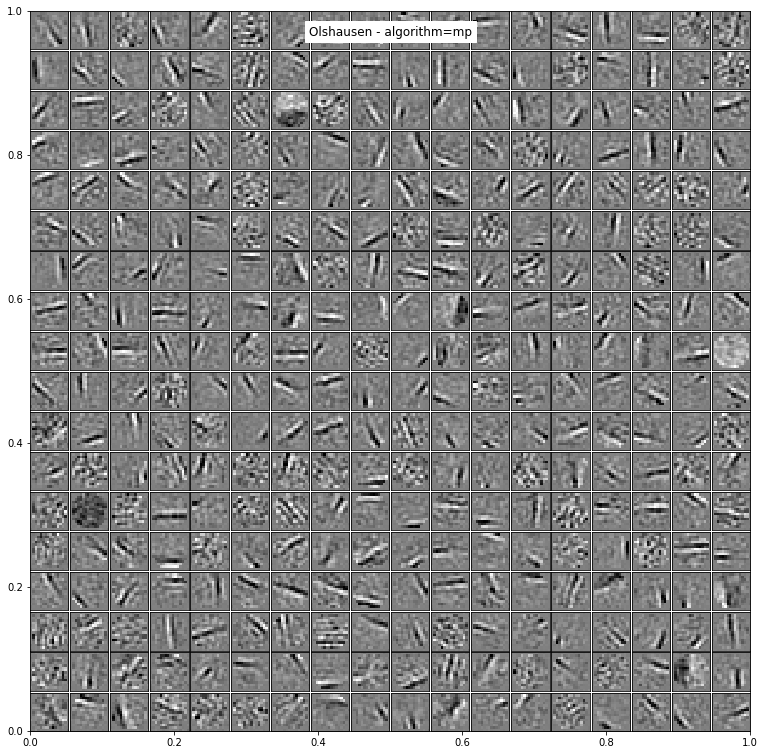

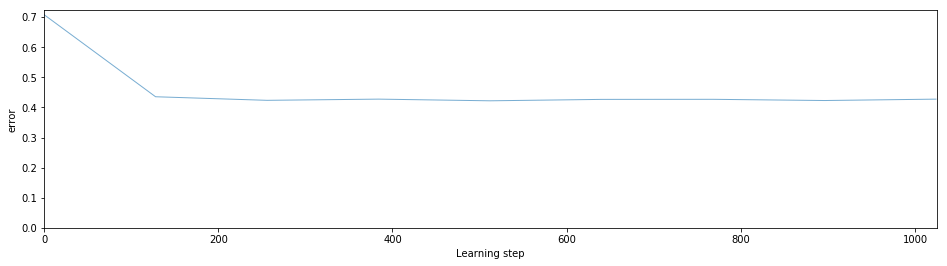

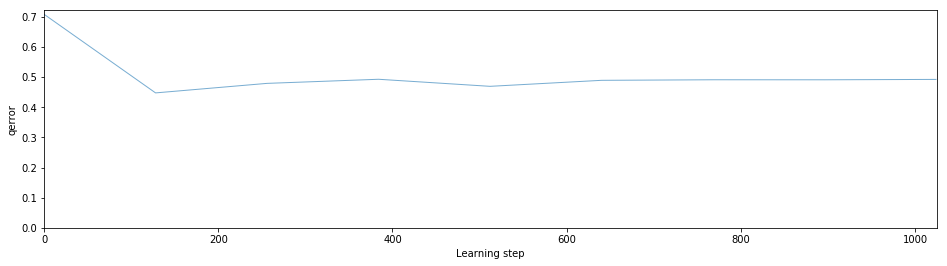

In [6]:
for algorithm in ['lasso_lars', 'lasso_cd', 'lars', 'threshold', 'omp', 'mp']:
    shl = SHL(**deepcopy(opts), learning_algorithm=algorithm)
    matname = tag + ' - algorithm={}'.format(algorithm)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    
    plt.show()    

## Version used

In [7]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.3.0 x86_64 i386 64bit
numpy 1.14.0
shl_scripts 20171221
Wed Jan 31 15:21:29 2018 CET